In [421]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math

https://visgraf.github.io/tcv-2026/mg-tarefas.pdf

# Representação do Disco

## Representação uniforme

### Primeira tentativa

Na representação uniforme, dividimos a imagem em uma malha quadriculada e para cada quadrado classificamos se está dentro do disco, passa pela borda ou está fora.

In [422]:
#Centro do disco
cx = 0.3 
cy = 0.4
#Raio do disco
r = 0.21

#Função para classificar se um ponto está dentro ou fora do disco
def inside_circle(x, y): 
    return (x - cx)** 2 + (y - cy)**2 <= r**2

A ideia para verificar se um quadrado está dentro, fora ou passar pela borda do disco é olhar os seus quatro vértices.  

Caso os 4 vértices estejam dentro, então classificamos que o quadrado está dentro.  
Caso os 4 vértices estejam fora, então classificamos que está fora (**atenção**).  
Caso não aconteça nenhum desses casos, então a borda do disco passa por esse quadrado.


In [423]:
def classify_circle(x, y, l):
    """

    Classifica o quadrado em relação ao disco

    Parâmetros:
    x: x do canto inferior esquerdo do quadrado
    y: y do canto inferior esquerdo do quadrado
    l: lado do quadrado

    Retorno:
    Classificação do quadrado
    
    """
    
    corners = [(x, y), (x+l, y), (x+l, y+l), (x, y+l)]

    count = 0
    for xp, yp in corners:
        if inside_circle(xp, yp):
            count+=1

    if count == 4:
        return 'inside'
    elif count == 0:
        return 'outside'
    else:
        return 'undefined'

Com isso, pegamos a figura e dividimos em quadrados e classificamos cada um deles.

In [424]:
def draw_uniform(classify, ax, xi, yi, l, profundidade = 40):
    """
    Desenha uma malha uniforme de quadrados e colore 
    de acordo com sua classifcação em relação a figura.

    Parâmetros:
    classify: Função de classificação do quadrado
    ax: Eixo do matplotlib onde os quadrados são desenhados
    xi: x do canto inferior esquerdo do quadrado
    yi: y do canto inferior esquerdo do quadrado
    l: Tamanho do quadrado
    profundidade: Número de divisões de quadrado

    """

    p = l/profundidade #Distancia entre cada aresta
    
    for i in range(profundidade):
        for j in range(profundidade):
            px = i*p #Passo de x
            py = j*p #Passo de y

            classificacao = classify(xi+ px, yi+ py, p)

            if classificacao == 'outside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#6fa8ff', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'inside':
                reta = patches.Rectangle((xi+px, yi+py), p, p, facecolor='#e06666', edgecolor='black')
                ax.add_patch(reta)

            if classificacao == 'undefined':
                reta = patches.Rectangle((xi + px, yi + py), p, p,facecolor='#b7b7b7', edgecolor='black')
                ax.add_patch(reta)


Com todas as funções feitas, testamos a representação uniforme com uma malha 40x40.

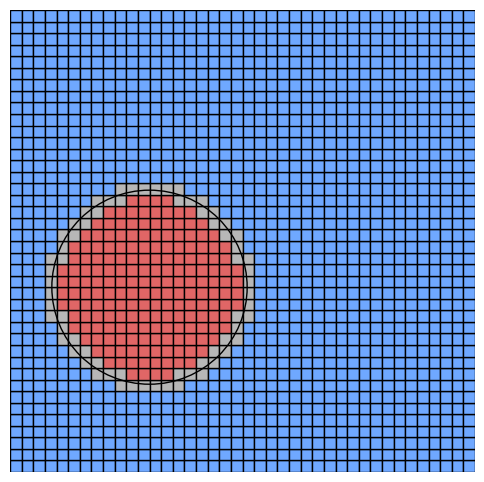

In [425]:
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

Para esse caso funciona, mas pode ocorrer em alguns casos que os 4 vértices do quadrado esteja fora da figura, assim ele é classificado como se estivesse fora, mesmo nao sendo (exemplo abaixo). Então temos que classificar de outra forma.

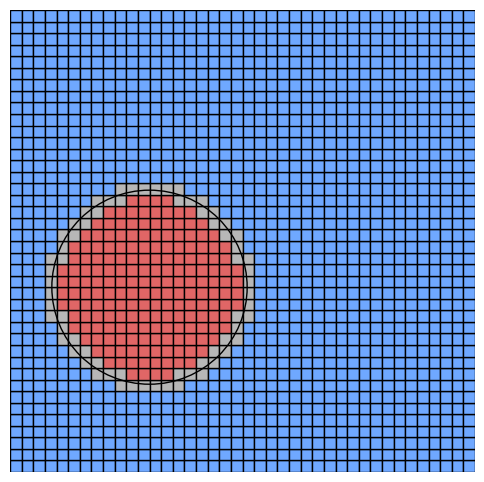

In [426]:
#Plot
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)

ax.axis('off')

plt.show()

### Outra forma de classifição 

A ideia dessa forma de classificação é pegar os pontos do quadrado mais distante e o mais próximo do centro do círculo, aí pode acontecer 3 casos:  

Caso o ponto do quadrado mais próximo do centro do círculo seja maior que o raio, então o quadrado está fora;  
Caso o ponto do quadrado mais distante do centro do círculo seja menor que o raio, então o quadrado está dentro;  
Se não acontece nenhum dos dois, o círculo passa pelo quadrado.

In [427]:
#Calculo da distância mínima
def dist_min(x, y, cx, cy, p):
    dx = max(x-cx, 0, cx-x-p)
    dy = max(y-cy, 0, cy-y-p)
    
    return math.sqrt(dx**2 + dy**2)

#Calculo da distância máxima
def dist_max(x, y, cx, cy, p):
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]
    dist = [math.dist((cx, cy), c) for c in corners]

    return max(dist)

In [428]:
#Função para classificar o círculo, só que da outra forma
def classify_circle(x, y, p):
    
    dmin = dist_min(x, y, cx, cy, p)
    dmax = dist_max(x, y, cx, cy, p)

    if dmin > r:
        return 'outside'
    elif dmax < r:
        return 'inside'
    else:
        return 'undefined'

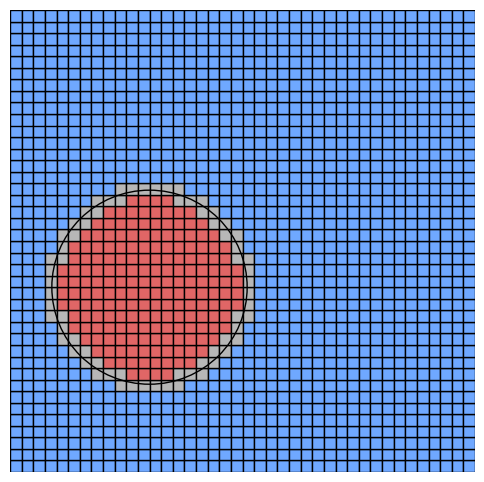

In [429]:
#Plot 
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

## Representação adaptativa

Na representação adaptativa primeiro classificamos o quadrado, caso seja um quadrado em que a borda do disco passe lá, então dividimos em 4 quadrados e recursivamente classificamos os 4.

Aqui a primeira forma de classificação do círculo daria problema, pois se a figura estivesse inteira dentro do quadrado ele apenas classificaria tudo como fora e não iria dividir para classificar o resto.

In [430]:
def draw_adaptative(classify, ax, xi, yi, l, k = 6):
    """
    Desenha uma malha uniforme de quadrados e colore 
    de acordo com sua classifcação em relação a figura.

    Parâmetros:
    classify: Função de classificação do quadrado
    ax: Eixo do matplotlib onde os quadrados são desenhados
    xi: x do canto inferior esquerdo do quadrado
    yi: y do canto inferior esquerdo do quadrado
    l: Tamanho do quadrado
    k: Número máximo de divisões do quadrado

    """


    if k == 0:
        return

    classificacao = classify(xi, yi, l)

    if classificacao == 'outside':
        reta = patches.Rectangle((xi, yi), l, l, facecolor='#6fa8ff', edgecolor='black')
        ax.add_patch(reta)

    if classificacao == 'inside':
        reta = patches.Rectangle((xi, yi), l, l, facecolor='#e06666', edgecolor='black')
        ax.add_patch(reta)

    if classificacao == 'undefined':
        reta = patches.Rectangle((xi, yi), l, l,facecolor='#b7b7b7', edgecolor='black')
        ax.add_patch(reta)

        #Dividir em 4
        draw_adaptative(classify, ax, xi, yi, l/2, k-1)
        draw_adaptative(classify, ax, xi+l/2, yi, l/2, k-1)
        draw_adaptative(classify, ax, xi+l/2, yi+l/2, l/2, k-1)
        draw_adaptative(classify, ax, xi, yi+l/2, l/2, k-1)
        
        

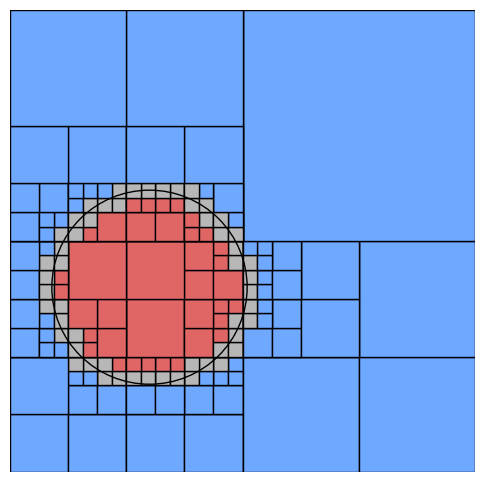

In [431]:
fig, ax = plt.subplots(figsize=(6,6))

draw_adaptative(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

# Representação da Parabola

Para as representações uniformes e adaptativas da parábola podemos utilizar as funções já definidas, apenas precisamos mudar a forma de classificação de cada quadrado, já que não é mais a mesma forma.  

Novamente fazendo a mesma forma de classificação ingênua feita antes: olhamos os quatro vértices do quadrado e classificamos de acordo com a quantidade que está fora e a quantidade que está dentro.

In [432]:
c = 0

#Função para classificar se um ponto está dentro ou fora da parabola
def above_curve(x, y):
    return y >= x**2 + c

In [433]:
def classify_curve(x, y, p):
    
    corners = [(x, y), (x+p, y), (x+p, y+p), (x, y+p)]

    count = 0
    for xp, yp in corners:
        if above_curve(xp, yp):
            count+=1

    if count == 4:
        return 'inside'
    elif count == 0:
        return 'outside'
    else:
        return 'undefined'

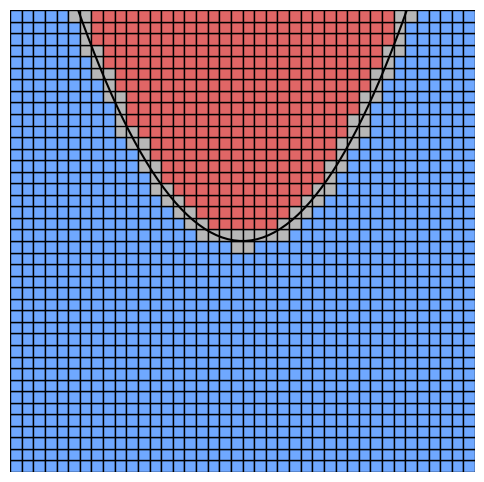

In [434]:
#Plot
fig, ax = plt.subplots(figsize=(6,6))

draw_uniform(classify_curve, ax, -2, -2, 4)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()

### Outra forma de classificação

Ao invés de observar os vértices do quadrado, observamos a curva no intervalo e assim classificar o quadrado. Tomamos o valor mínimo e máximo da curva no intervalo e classificamos de acordo com os casos.

Caso o valor máximo da curva no intervalo esteja abaixo do quadrado, então 

In [435]:
def classify_curve(x, y, p):


    #x onde y é máximo no intervalo
    xmax = max([x, x+p], key=abs)

    #x onde y é mínimo no intervalo
    if x <= 0 <= x+p:
        xmin = 0
    else:
        xmin = min([x, x+p], key=abs)

    #Se o maior ponto da curva no intervalo está abaixo do quadrado
    if above_curve(xmax, y):
        return "inside"
    #Se o menor ponto da curva no intervalo está acima do quadrado
    elif not above_curve(xmin, y+p):
        return "outside"
    else:
        return "undefined"


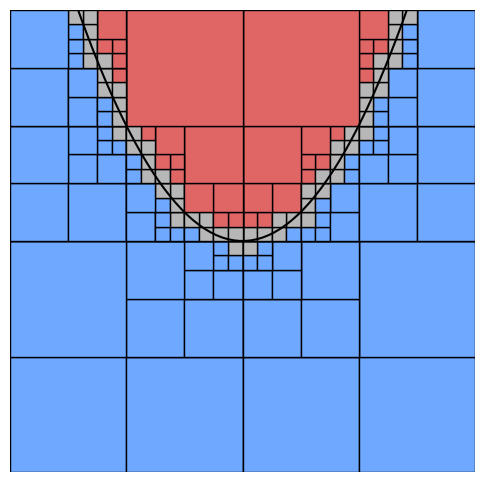

In [436]:
#Plot
fig, ax = plt.subplots(figsize=(6,6))

draw_adaptative(classify_curve, ax, -2, -2, 4)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()

## Plot aleatório

Código para plotar representações uniformes aleatórias

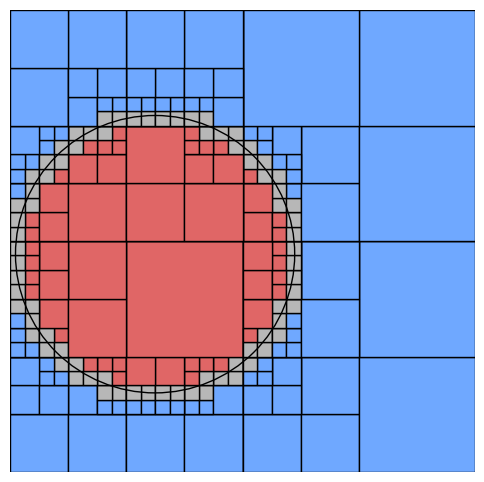

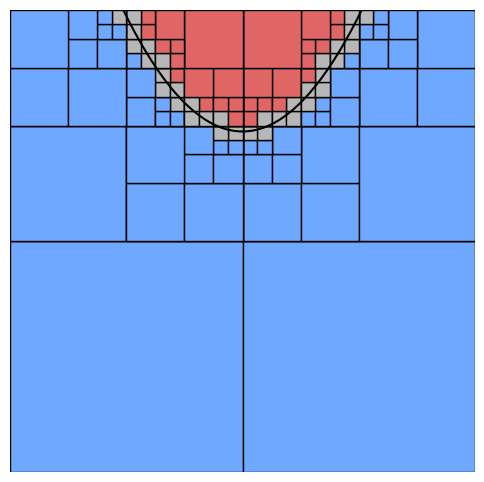

In [437]:
import random

#=========================================
#Plot disco
#=========================================

cx = random.uniform(0.25, 0.75)
cy = random.uniform(0.25, 0.75)
r = random.uniform(0.1, 0.40)

fig, ax = plt.subplots(figsize=(6,6))

draw_adaptative(classify_circle, ax, 0.0, 0.0, 1)

circle = plt.Circle((cx, cy), r, edgecolor='black', facecolor='none')
ax.add_patch(circle)
ax.axis('off')

plt.show()

#=========================================
#Plot curva
#=========================================

c = random.uniform(-1.75, 1.75)

fig, ax = plt.subplots(figsize=(6,6))

draw_adaptative(classify_curve, ax, -2, -2, 4, k=6)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

x = np.linspace(-10, 10, 400)
y = x**2 + c
plt.plot(x, y, color='black')

ax.axis('off')

plt.show()
